In [1]:
import os
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("armitaraz/chatgpt-reddit", "chatgpt-reddit-comments.csv")

data = pd.read_csv(path).dropna()

data.tail()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
52410,16667,j4lbiix,t1_j4kgcac,"Scary thing is, in this future text won’t be t...",r/technology
52411,16668,j5m0v6m,t3_10jmvpj,"Read the T.O.S., you'll thank me later",r/technology
52412,16669,j5m6aj0,t1_j5m0v6m,What am I missing here... https://openai.com/t...,r/technology
52413,16670,j5nylax,t1_j5m0v6m,What does ChatGTP think of its own TOS?,r/technology
52414,16671,j5mwpdr,t1_j5m6aj0,Don't know what they're referring to in the TO...,r/technology


In [2]:
docs = data["comment_body"]
categories = data["subreddit"]

In [3]:
from narrativegraphs import NarrativeGraph
from narrativegraphs.nlp.tuplets.cooccurrences import DocumentCooccurrenceExtractor

if os.path.exists("chatgpt_reddit.db"):
    model = NarrativeGraph.load("chatgpt_reddit.db")
else:
    model = NarrativeGraph(
        cooccurrence_extractor=DocumentCooccurrenceExtractor(),
        sqlite_db_path="chatgpt_reddit.db",
        on_existing_db="overwrite"
    ).fit(docs)

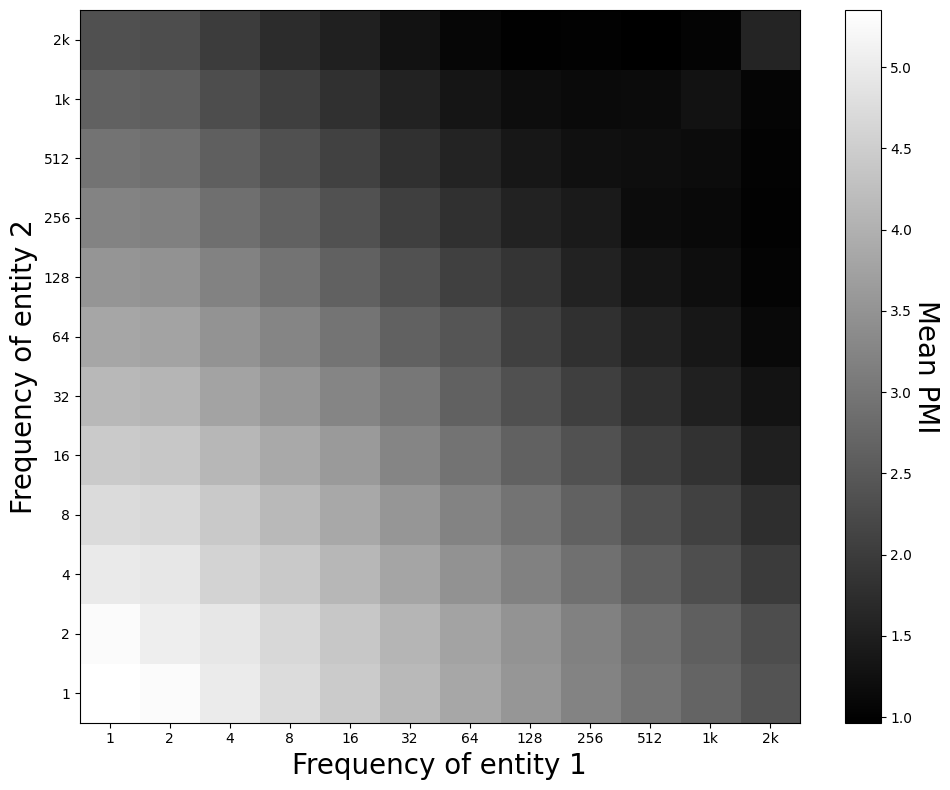

In [4]:
from sharedutils import visualize_pmi_by_frequency

visualize_pmi_by_frequency(model.cooccurrences_)

In [5]:
from narrativegraphs import GraphFilter

graph_filter = GraphFilter(
    minimum_edge_frequency=3,
    minimum_node_frequency=5,
)

In [7]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    min_weight=2,
    community_detection_method_args=dict(k=3)
)
for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    print(*[e.label for e in comm.members], sep=", ")
    print()

CHATGBT, the reading, WWW

the shortcomings, right answers, Chad

spelling errors, higher rates, a B

young people, their servants, this great tool

simple question, especially those, every single answer

Siri, this crap, Alexa, Cortana

The military, 60s, DARPA, their tech

deep fake, almost all, some regards

tech companies, a fortune, CPU

5 minute, 10 hours, 2 hours

a vital role, the science, a human body

6, a ad, Joe

the rainbow, a long way, The big deal

the firm, Apologies, the bullshit

PowerShell, SQL, Excel

the growth, the last decade, Texas

simple fact, content moderators, NSFW, the necessity

one prompt, early day, long stories

IDE, just the next step, 1998

how ChatGPT, a breath, media pundits

white people, Jews, asian, islamic, Christians

Steve Jobs, my brain, Not something

one company, Chart, 99.9%, this observation, Two things

40 hour, our economy, Designer

the volumes, the tubes, a pitch

1 year, the evil, mission statement

grammar mistakes, 2nd, the opinio

In [8]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    community_detection_method="louvain",
    min_weight=2,
    community_detection_method_args=dict(resolution=5)
)
for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    print(*[e.label for e in comm.members], sep=", ")
    print()

A teacher’s job, each kid’s personality

the life changing impact, The irony

artificial general intelligence benefits, Our mission

A cat and mouse game, tenured professors

stupid questions, stupid answers

4 examples, that decision, their own adventure, Display Time, a two paragraph description, numbered lists, other characters, the 4th option, the rest, Input, that location, Users, source material, some health, a line break, this set, Chatting, same shit, their problems, The length, my characters, ( "display location, an adventure, one neutral option, one immoral option, HP Lovecraft's, any action, RPG, the last option, the Text-based Role-playing Engine, Each scene, your word use, proper names, at least one moral option, your replies, ToS, At least one, the scene description, The choice, •	⁠You, the following rules, the names, TREVOR, the real answer

Galactica, whole model, A weapon, Blacksmith, nuclear fission, A nuclear missile, five year old

literary devices, any dream, The G

In [ ]:
# create server to be viewed in own browser which blocks execution of other cells
model.serve_visualizer()